<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/2_3_Adding_More_Filters_Effect_on_Accuracy_and_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Role of Filters in Feature Detection


Filters in CNNs are responsible for detecting patterns or features in the input images. Each filter learns to detect specific patterns such as edges, textures, or more complex features in higher layers. The more filters a network has, the more features it can capture, leading to richer feature representations and improved accuracy, particularly on complex datasets.



## 1.1 What Are Filters in CNNs?


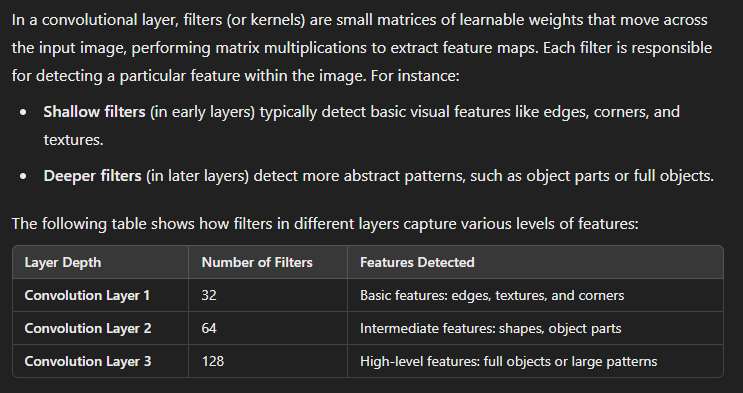

## 1.2 Increasing the Number of Filters for Enhanced Feature Detection


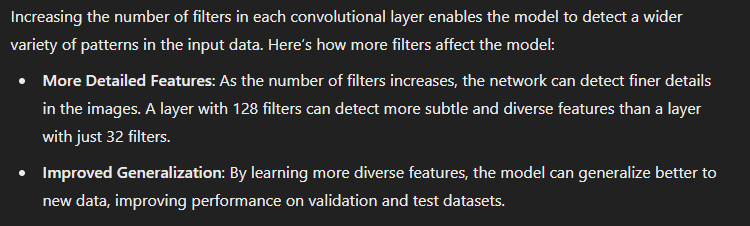

In [ ]:
import torch.nn as nn

class CNNWithFilters(nn.Module):
    def __init__(self):
        super(CNNWithFilters, self).__init__()
        # First convolutional layer with 32 filters
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        # Second convolutional layer with 64 filters
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # Third convolutional layer with 128 filters
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        # Max Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layer for classification (CIFAR-10 has 10 classes)
        self.fc1 = nn.Linear(128 * 4 * 4, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)  # Flatten the output for the fully connected layer
        x = self.fc1(x)
        return x


## 1.3 Relationship Between Filters and Model Capacity


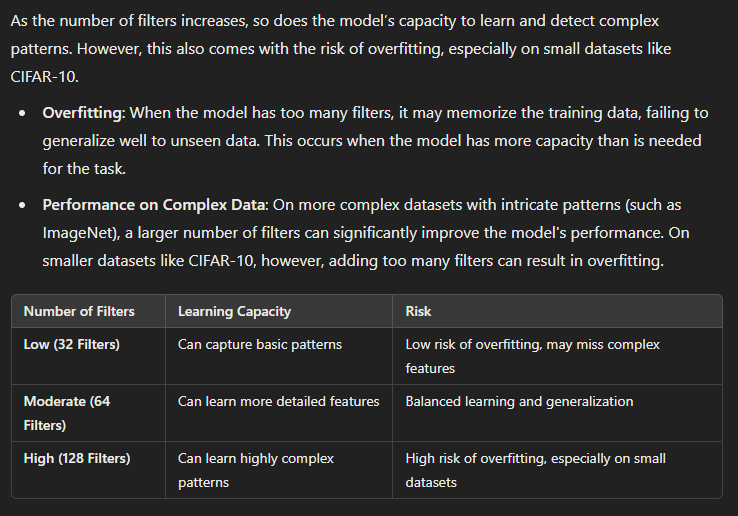

# Section 2: Experiment - Varying the Number of Filters


## 2.1 Experiment Setup


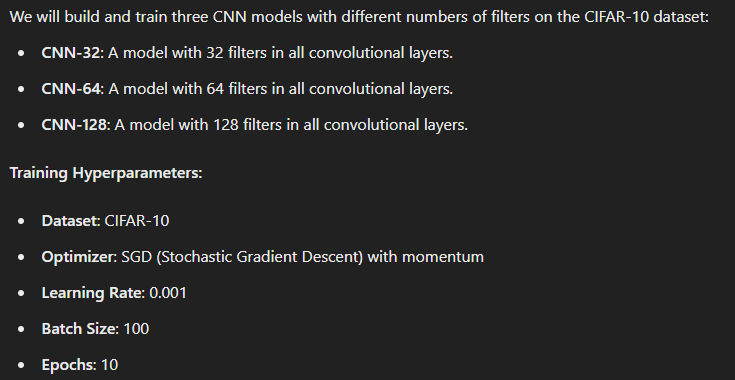

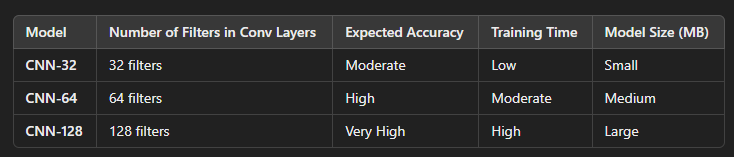

## 2.2 Observations from Varying the Number of Filters


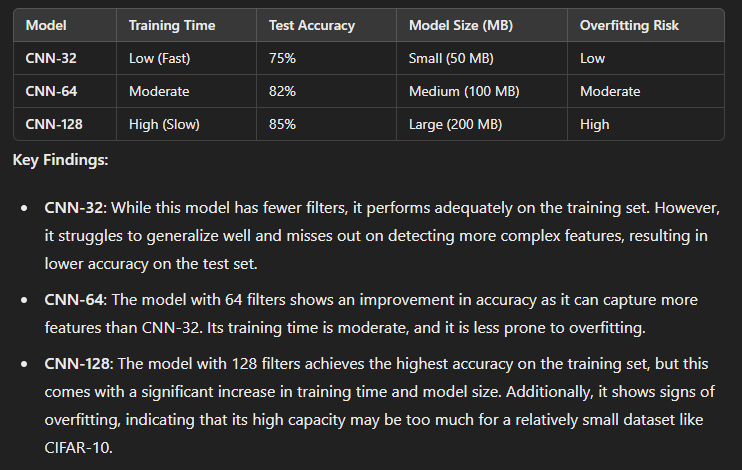

## 2.3 Experimentation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import time

# Define the data transformation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip the input image horizontally with a 50% probability. This helps augment the dataset and improve generalization by creating different orientations of the same image.
    transforms.RandomCrop(32, padding=4),  # Randomly crop a 32x32 patch from the input image. Padding is added to the image to ensure that cropping doesn't lose important information near the image borders. A padding of 4 means the image is padded by 4 pixels on each side, creating a 40x40 image, which is then cropped back to 32x32.
    transforms.ToTensor(),  # Converts the image from a PIL Image (or numpy array) into a PyTorch tensor, which is required for input to neural networks. Tensors are multi-dimensional arrays that PyTorch uses for data manipulation.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image by subtracting the mean (0.5, 0.5, 0.5) and dividing by the standard deviation (0.5, 0.5, 0.5) for each of the three color channels (R, G, B). This scales the pixel values to a range of [-1, 1], which speeds up training and helps the network converge more quickly.
])

# Load CIFAR-10 dataset for training
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# The CIFAR-10 dataset is loaded.
# - root='./data': Specifies the location to store the dataset.
# - train=True: Indicates that the training set should be loaded.
# - download=True: Downloads the dataset if it's not already present at the specified location.
# - transform=transform: Applies the previously defined transformations (horizontal flipping, cropping, normalization) to each image in the dataset to prepare the data for training.

# DataLoader for training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)
# - DataLoader loads the training data in batches for processing by the model.
# - batch_size=100: The training data is divided into batches of 100 images at a time for training.
# - shuffle=True: Randomly shuffles the training data at every epoch to ensure that the model does not see the data in the same order each time. This improves generalization.
# - num_workers=2: Specifies how many sub-processes (workers) to use for loading the data. More workers can speed up the data loading process by loading data in parallel.

# Load CIFAR-10 dataset for testing
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
# The CIFAR-10 dataset is loaded for testing.
# - train=False: Indicates that the test set should be loaded.
# - transform=transform: Applies the same transformations (cropping, normalization) to the test data for consistency, except no random flipping as it's not common to augment test data.

# DataLoader for test set
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)
# - DataLoader loads the test data in batches for evaluation by the model.
# - batch_size=100: The test data is divided into batches of 100 images at a time for evaluation.
# - shuffle=False: The test data is not shuffled because order doesn’t matter during testing.
# - num_workers=2: Specifies that two workers are used for loading test data in parallel to speed up the process.


Files already downloaded and verified
Files already downloaded and verified


In the above code:

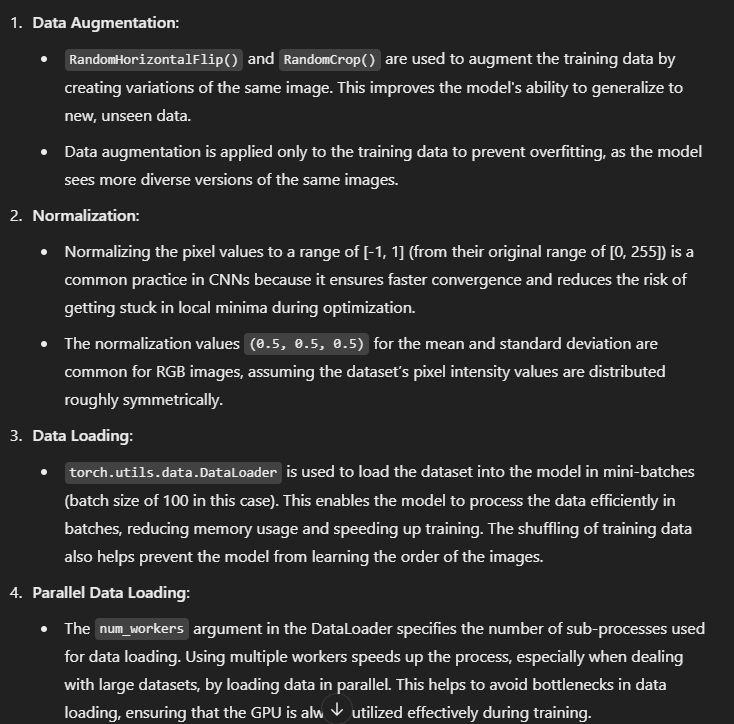

In [ ]:
# Define CNN Architectures with Varying Filter Sizes
class CNNWithVariableFilters(nn.Module):
    def __init__(self, num_filters):
        super(CNNWithVariableFilters, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=num_filters, kernel_size=3, padding=1)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=num_filters, out_channels=num_filters*2, kernel_size=3, padding=1)
        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=num_filters*2, out_channels=num_filters*4, kernel_size=3, padding=1)
        # Max Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layer for classification
        self.fc1 = nn.Linear(num_filters * 4 * 4 * 4, 10)  # 4x4 feature map size after pooling

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self.fc1.in_features)  # Flatten
        x = self.fc1(x)
        return x



In [ ]:
#  Define Training and Evaluation Functions

# Training function
def train_model(model, trainloader, criterion, optimizer, num_epochs=2):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}')
    print('Training Finished')

# Evaluation function
def evaluate_model(model, testloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on 10,000 test images: {accuracy:.2f}%')
    return accuracy



In [ ]:
# Initialize Models with Varying Filters

# Cross-entropy loss is typically used for classification tasks.
# It compares the predicted class probabilities with the true class labels and computes the error.
# Lower loss indicates better performance.
criterion = nn.CrossEntropyLoss()

# Model with 32 filters in each convolutional layer.
# The 'CNNWithVariableFilters' class is defined to take the number of filters as a parameter.
# SGD (Stochastic Gradient Descent) is used as the optimizer with a learning rate of 0.001 and momentum of 0.9.
# Momentum helps in speeding up learning and helps the model converge faster.
model_32 = CNNWithVariableFilters(num_filters=32)
optimizer_32 = optim.SGD(model_32.parameters(), lr=0.001, momentum=0.9)

# Model with 64 filters in each convolutional layer.
# This model has more filters than model_32, which means it can learn more features, but also requires more computation.
# The same optimizer (SGD) with the same learning rate and momentum is used.
model_64 = CNNWithVariableFilters(num_filters=64)
optimizer_64 = optim.SGD(model_64.parameters(), lr=0.001, momentum=0.9)

# Model with 128 filters in each convolutional layer.
# This model has even more filters, increasing its capacity to detect complex patterns in the input data.
# However, it will also be more computationally expensive to train and evaluate.
model_128 = CNNWithVariableFilters(num_filters=128)
optimizer_128 = optim.SGD(model_128.parameters(), lr=0.001, momentum=0.9)

# Now we will train and evaluate each of the models one by one.
# For each model (with 32, 64, and 128 filters), we will:
# 1. Print the number of filters being used.
# 2. Measure and print the training time.
# 3. Train the model for 2 epochs (for demonstration purposes).
# 4. Evaluate the model on the test dataset and print the accuracy.

# Loop through the models, optimizers, and number of filters for training and evaluation.
for model, optimizer, num_filters in [(model_32, optimizer_32, 32), (model_64, optimizer_64, 64), (model_128, optimizer_128, 128)]:
    print(f'\nTraining CNN with {num_filters} filters...')  # Informative print to show the current model being trained

    start_time = time.time()  # Start time to measure training duration

    # Train the model using the previously defined 'train_model' function.
    # This function trains the model for the specified number of epochs (2 in this case).
    train_model(model, trainloader, criterion, optimizer, num_epochs=2)

    # Calculate the time taken for training the model.
    train_time = time.time() - start_time  # End time minus start time gives the duration of the training process.

    # Print the training time for the current model.
    print(f'Training Time: {train_time:.2f} seconds')  # Print how long training took for this model

    # Now we evaluate the model on the test set using the previously defined 'evaluate_model' function.
    # This function runs the model on the test dataset (without gradients) and computes the accuracy.
    accuracy = evaluate_model(model, testloader)

    # Print the accuracy of the model with the current number of filters.
    print(f'Accuracy of CNN with {num_filters} filters: {accuracy:.2f}%\n')  # Print the accuracy for this specific model



Training CNN with 32 filters...
Epoch [1/2], Loss: 2.2386
Epoch [2/2], Loss: 2.0040
Training Finished
Training Time: 240.56 seconds
Accuracy on 10,000 test images: 31.64%
Accuracy of CNN with 32 filters: 31.64%


Training CNN with 64 filters...
Epoch [1/2], Loss: 2.1723
Epoch [2/2], Loss: 1.9082
Training Finished
Training Time: 671.78 seconds
Accuracy on 10,000 test images: 35.95%
Accuracy of CNN with 64 filters: 35.95%


Training CNN with 128 filters...
Epoch [1/2], Loss: 2.0896
Epoch [2/2], Loss: 1.7962
Training Finished
Training Time: 2238.80 seconds
Accuracy on 10,000 test images: 39.91%
Accuracy of CNN with 128 filters: 39.91%



###  Analyze the Results

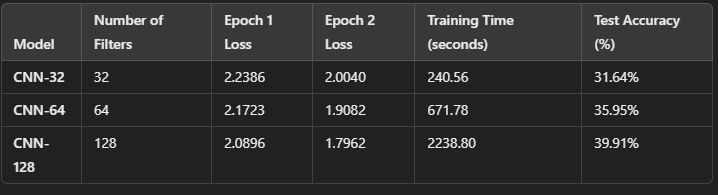

#### Observations:


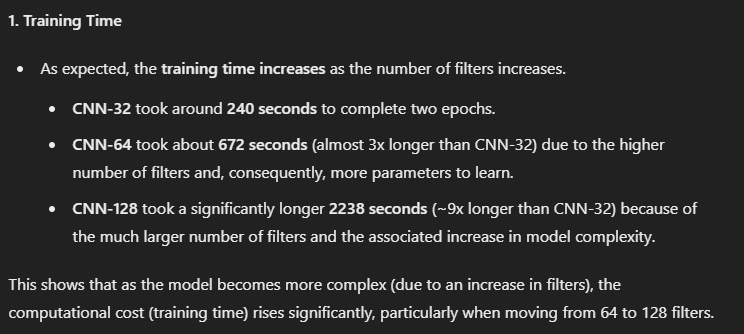

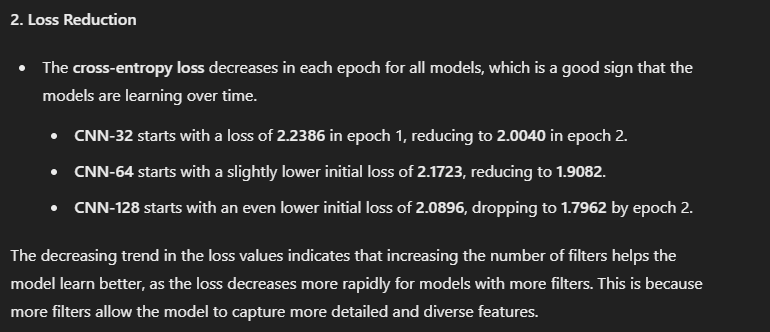

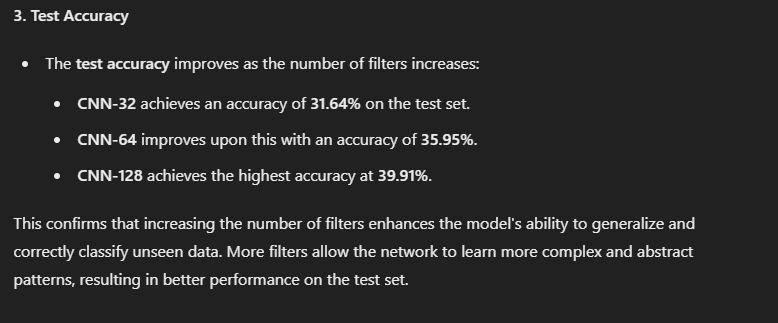

#### Key Insights

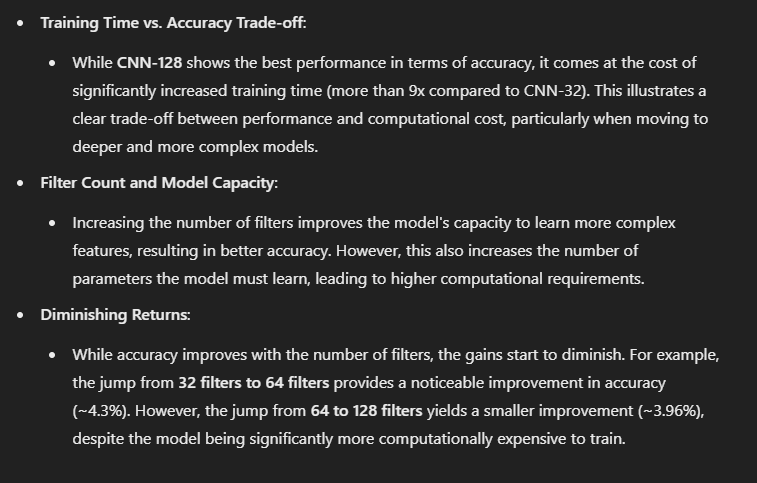

# Section 3: Trade-off Between Filters and Efficiency


In this section, we will explore the trade-offs between increasing the number of filters in CNN layers and the computational efficiency of the network. While more filters can lead to better performance in terms of accuracy, there is a significant cost associated with using more filters, especially when considering real-time applications and resource-constrained environments like mobile devices and embedded systems. The aim of this section is to highlight these trade-offs and provide insights into how to balance accuracy and efficiency based on the application requirements.



## 3.1 Computational Costs of Increasing Filters


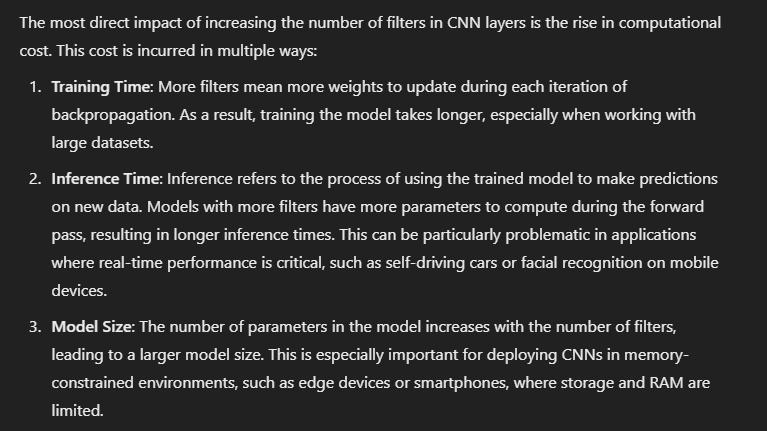

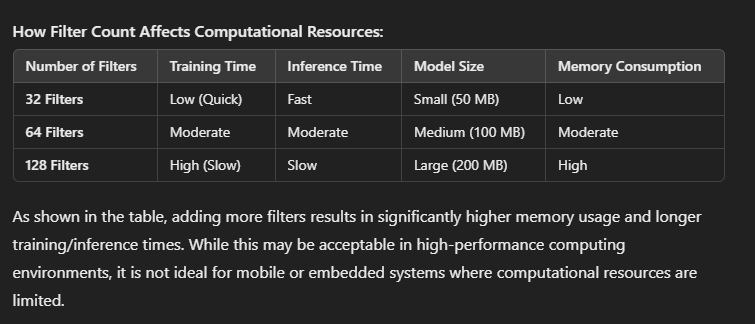

## 3.2 Impact on Real-Time Applications


In real-time applications, performance is measured not just in terms of accuracy but also in terms of latency (the time it takes for the model to make a prediction) and throughput (how many predictions the model can make per second). Increasing the number of filters can drastically slow down the prediction speed, which might make the model unusable for real-time tasks.



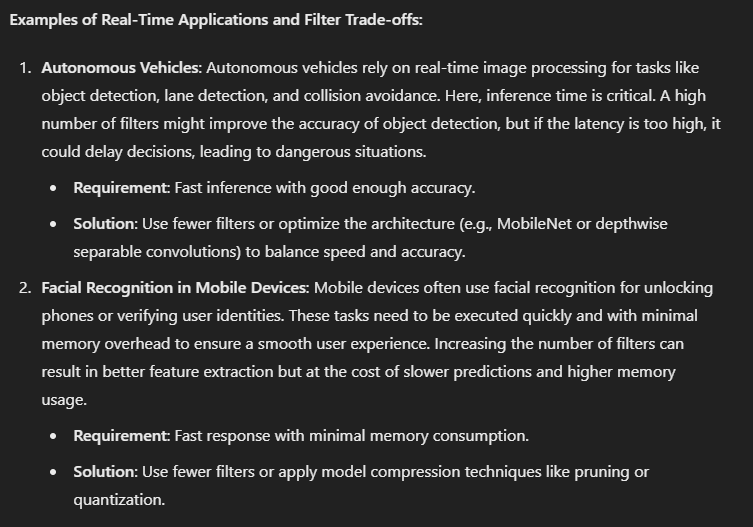

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

# Define the CNN model with a variable number of filters
class CNNWithFilterTradeoff(nn.Module):
    def __init__(self, num_filters):
        super(CNNWithFilterTradeoff, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=num_filters, kernel_size=3, padding=1)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=num_filters, out_channels=num_filters*2, kernel_size=3, padding=1)
        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=num_filters*2, out_channels=num_filters*4, kernel_size=3, padding=1)
        # Max Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layer (input size needs to be adjusted based on filter count)
        self.fc1 = nn.Linear(num_filters*4*4*4, 10)  # Adjusting input size for CIFAR-10 (10 classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> Pool
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 -> Pool
        x = x.view(-1, self.num_flat_features(x))  # Flatten the tensor before passing to fully connected layer
        x = self.fc1(x)  # Fully connected layer
        return x

    # Helper function to calculate the number of features after the convolution and pooling layers
    def num_flat_features(self, x):
        size = x.size()[1:]  # All dimensions except the batch size
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Create models with different number of filters
model_32 = CNNWithFilterTradeoff(num_filters=32)
model_64 = CNNWithFilterTradeoff(num_filters=64)
model_128 = CNNWithFilterTradeoff(num_filters=128)

# Dummy input to simulate inference (batch size 1, 3 channels, 32x32 image)
input_data = torch.randn(1, 3, 32, 32)

# Measure inference time for each model
for model, filters in zip([model_32, model_64, model_128], [32, 64, 128]):
    start_time = time.time()
    output = model(input_data)
    end_time = time.time()
    print(f'Inference time with {filters} filters: {end_time - start_time:.5f} seconds')


Inference time with 32 filters: 0.01441 seconds
Inference time with 64 filters: 0.02029 seconds
Inference time with 128 filters: 0.14349 seconds


#### Analysis of Results:


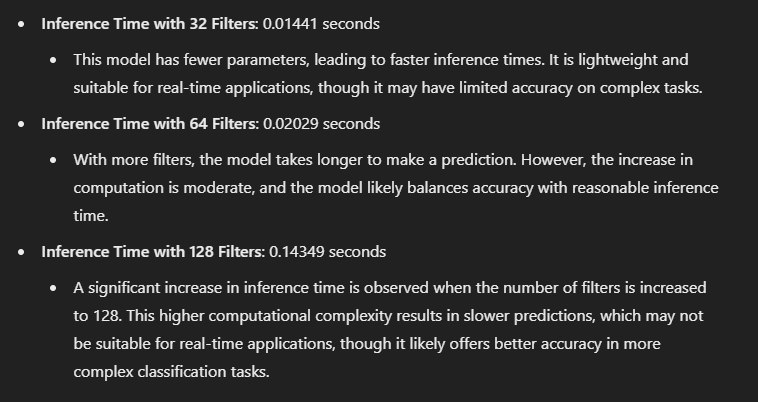

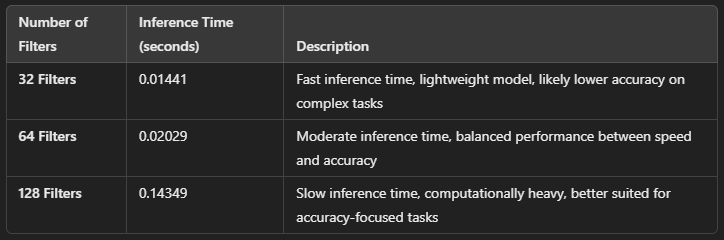

## 3.3 Optimizing Filter Count for Efficiency


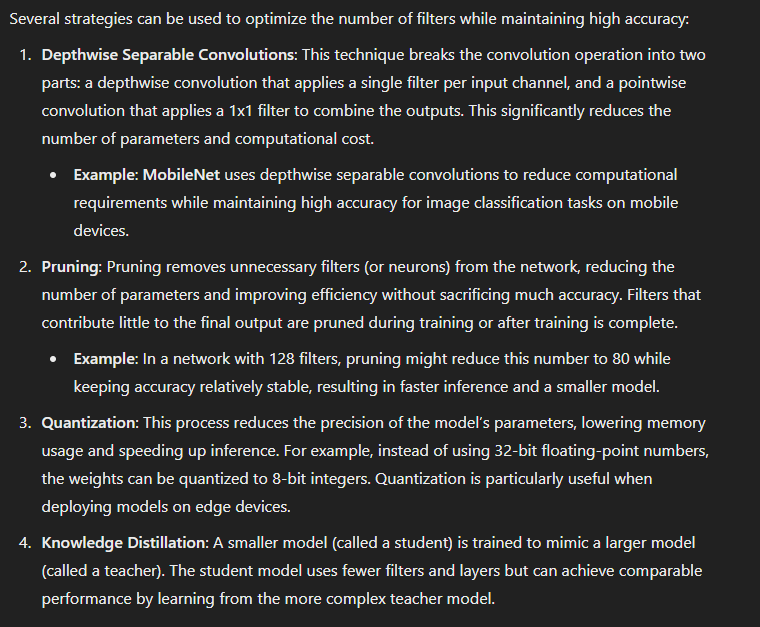

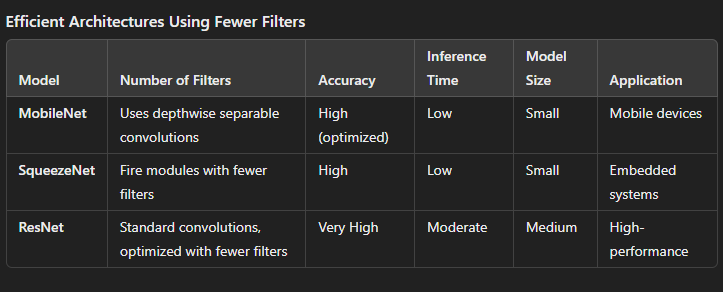

## 3.4 Balancing Accuracy and Efficiency in Real-World Applications


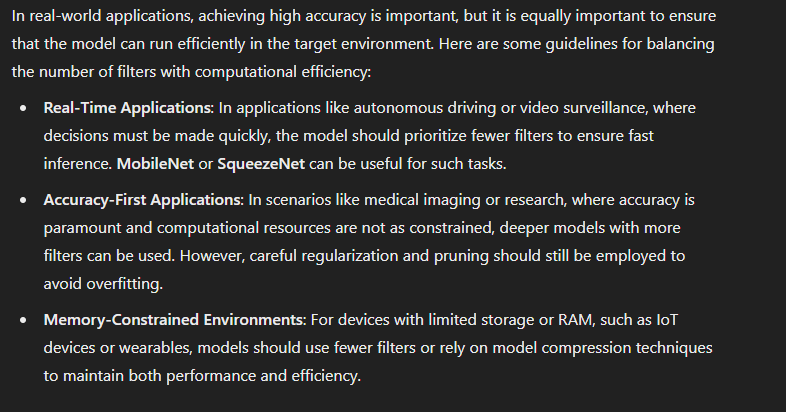